### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the IBM Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one prototype benchmark program.

In [1]:
min_qubits=2
max_qubits=8
max_circuits=3
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre',
#                  "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # *** Use these lines when running on hardware backend, to limit use of resources
# min_qubits=2
# max_qubits=5
# max_circuits=1
# num_shots=100


In [2]:
# To enable BlueQubit execution with several options for testing
# A simple example will be moved to first cell later

# # *** Use these lines when running on hardware backend, to limit use of resources
min_qubits=4
max_qubits=8
skip_qubits=2
max_circuits=1
num_shots=1000

# An example using BlueQubit provider (backend_id=CPU/QPU, device=cpu/qpu)
import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
provider_backend = bluequbit.init()
backend_id="BlueQubit-CPU"
exec_options = { "executor": bluequbit_executor.run, "device":'cpu' }

# Set True to enable verbose trace of BlueQubit executor
bluequbit_executor.verbose=True

import sys
sys.path.insert(1, "_common")
sys.path.insert(1, "_common/qiskit")

# Set True to include elapsed time in metrics plots
import metrics
metrics.show_elapsed_times = True

# Set these True to enable verbose and verbose_time execution
import execute
execute.verbose=False
execute.verbose_time=True

# Set False to disable calculation of 'normalized depth' (long time for large circuits)
# (if False, only 'algorithmic' depth will be displayed in plots)
execute.use_normalized_depth = False
#execute.max_jobs_active = 1

# Enable larger # qubits for some circuits

sys.path.insert(1, "amplitude-estimation/qiskit")
import ae_benchmark
ae_benchmark.MAX_QUBITS=12

sys.path.insert(1, "grovers/qiskit")
import grovers_benchmark
grovers_benchmark.MAX_QUBITS=12


BQ-PYTHON-SDK - WARNING - Development version 0.4.0b1 of BlueQubit Python SDK is being used


In [3]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options = { "optimization_level": 3, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation }

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options = { "noise_model": custom_qiskit_noise_model.my_noise_model() }

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options = { "optimization_level": 3, "layout_method":'sabre', "routing_method":'sabre',
#                         "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) }

# # Example of a custom Executor (BlueQubit)
# import _common.executors.bluequbit_executor as bluequbit_executor
# exec_options = { "executor": bluequbit_executor.run, "device":'cpu' }


### Deutsch-Jozsa

Deutsch-Jozsa Benchmark Program - Qiskit
2
... execution starting at Aug 25, 2023 20:29:57 UTC
************
Executing [1] circuits with num_qubits = 4
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: tLDtAQ2BUSvoxsPu, device: cpu, run status: RUNNING, created on: 2023-08-25 20:29:56 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: tLDtAQ2BUSvoxsPu, device: cpu, run status: RUNNING, created on: 2023-08-25 20:29:56 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4


... result = Job ID: tLDtAQ2BUSvoxsPu, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:29:56 UTC, cost: $0.00, run time: 7 ms, queue time: 21 ms, num qubits: 4
  *** executor() time = 0.3734
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 5, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 5, 0.0, 0.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.0, 0.373, 0.007 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 6
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: F40YMth7t4JQdSJT, device: cpu, run status: RUNNING, created on: 2023-08-25 20:29:56 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: F40YMth7t4JQdSJT, device: cpu, run status: RUNNING, created on: 2023-08-25 20:29:56 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6


... result = Job ID: F40YMth7t4JQdSJT, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:29:56 UTC, cost: $0.00, run time: 5 ms, queue time: 24 ms, num qubits: 6
  *** executor() time = 0.4148
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 6, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 6, 0.0, 0.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.001, 0.415, 0.005 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 8
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: 5JNjBMGK5YvktcLn, device: cpu, run status: RUNNING, created on: 2023-08-25 20:29:57 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: 5JNjBMGK5YvktcLn, device: cpu, run status: RUNNING, created on: 2023-08-25 20:29:57 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8


... result = Job ID: 5JNjBMGK5YvktcLn, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:29:57 UTC, cost: $0.00, run time: 7 ms, queue time: 18 ms, num qubits: 8
  *** executor() time = 0.3727
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 6, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 6, 0.0, 0.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.001, 0.373, 0.007 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

... execution complete at Aug 25, 2023 20:29:58 UTC in 1.172 secs

Sample Circuit:
       ┌───┐      ░ ┌─────┐ ░ ┌───┐      ░ ┌─┐            
q16_0: ┤ H ├──────░─┤0    ├─░─┤ H ├──────░─┤M├────────────
       ├───┤      ░ │     │ ░ ├───┤      ░ └╥┘┌─┐         
q16_1: ┤ H ├──────░─┤1    ├─░─┤ H ├──────░──╫─┤M├─────────
       ├───┤      ░ │     │ ░ ├───┤      ░  ║ └╥┘┌─┐      
q16_2: ┤ H ├──────░─┤2    ├─░─┤ H ├──────░──╫──╫─┤M├──────
       ├───┤      

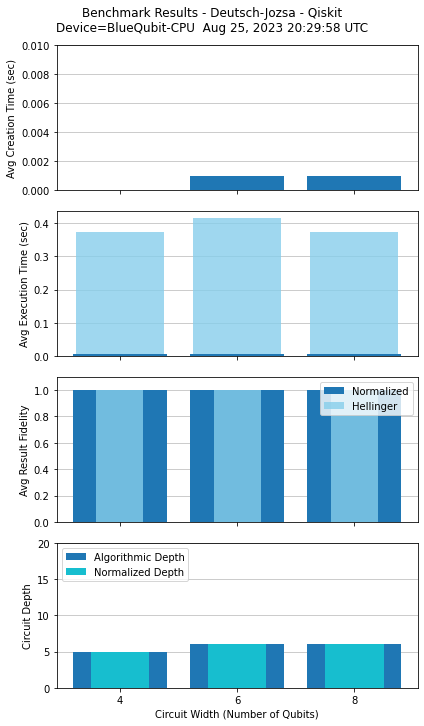

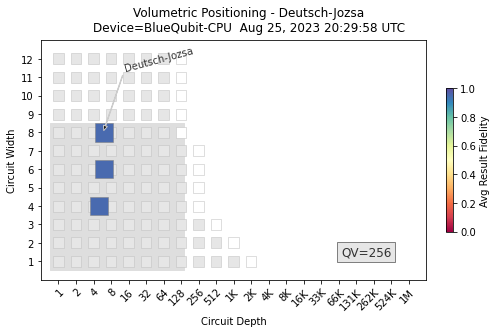

In [5]:
import sys
sys.path.insert(1, "deutsch-jozsa/qiskit")
import dj_benchmark
dj_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Bernstein-Vazirani - Method 1

Bernstein-Vazirani Benchmark Program - Qiskit
... execution starting at Aug 25, 2023 20:29:42 UTC
************
Executing [1] circuits with num_qubits = 4
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: 1xzDu41wRCDcFJDB, device: cpu, run status: RUNNING, created on: 2023-08-25 20:29:41 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: 1xzDu41wRCDcFJDB, device: cpu, run status: RUNNING, created on: 2023-08-25 20:29:41 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4


... result = Job ID: 1xzDu41wRCDcFJDB, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:29:41 UTC, cost: $0.00, run time: 4 ms, queue time: 22 ms, num qubits: 4
  *** executor() time = 0.7292
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 7, 0.167
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 7, 0.167, 2.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.001, 0.729, 0.004 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 6
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: IO1kuNq2YcTEie1E, device: cpu, run status: RUNNING, created on: 2023-08-25 20:29:42 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: IO1kuNq2YcTEie1E, device: cpu, run status: RUNNING, created on: 2023-08-25 20:29:42 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6


... result = Job ID: IO1kuNq2YcTEie1E, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:29:42 UTC, cost: $0.00, run time: 5 ms, queue time: 20 ms, num qubits: 6
  *** executor() time = 0.3555
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 8, 0.176
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 8, 0.176, 3.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.002, 0.356, 0.005 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 8
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: O0IagtnXZ06uciz3, device: cpu, run status: RUNNING, created on: 2023-08-25 20:29:42 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: O0IagtnXZ06uciz3, device: cpu, run status: RUNNING, created on: 2023-08-25 20:29:42 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8


... result = Job ID: O0IagtnXZ06uciz3, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:29:42 UTC, cost: $0.00, run time: 7 ms, queue time: 19 ms, num qubits: 8
  *** executor() time = 0.3665
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 8, 0.143
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 8, 0.143, 3.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.001, 0.367, 0.007 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

... execution complete at Aug 25, 2023 20:29:43 UTC in 1.469 secs

Sample Circuit:
       ┌───┐      ░ ┌─────┐ ░ ┌───┐      ░ ┌─┐            
q11_0: ┤ H ├──────░─┤0    ├─░─┤ H ├──────░─┤M├────────────
       ├───┤      ░ │     │ ░ ├───┤      ░ └╥┘┌─┐         
q11_1: ┤ H ├──────░─┤1    ├─░─┤ H ├──────░──╫─┤M├─────────
       ├───┤      ░ │     │ ░ ├───┤      ░  ║ └╥┘┌─┐      
q11_2: ┤ H ├──────░─┤2    ├─░─┤ H ├──────░──╫──╫─┤M├──────
       ├───┤  

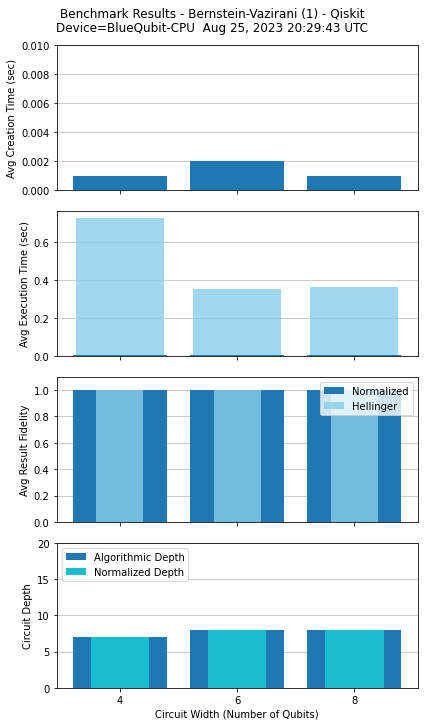

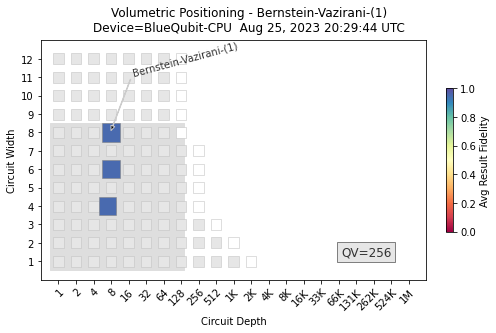

In [4]:
import sys
sys.path.insert(1, "bernstein-vazirani/qiskit")
import bv_benchmark
bv_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Bernstein-Vazirani - Method 2

In [6]:
import sys
sys.path.insert(1, "bernstein-vazirani/qiskit")
import bv_benchmark
bv_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

Bernstein-Vazirani Benchmark Program - Qiskit
... execution starting at Aug 11, 2023 21:53:14 UTC
************
Executing [1] circuits with num_qubits = 4
ERROR: Failed to execute circuit 4 3
... exception = Job 2C8UEjiaHlcSCP6o finished with status: FAILED_VALIDATION. Mid-circuit measurements are not supported. See https://app.bluequbit.io/docs for more details.
************
Executing [1] circuits with num_qubits = 6
ERROR: Failed to execute circuit 6 18
... exception = Job nmznTYMuiZrJBMnA finished with status: FAILED_VALIDATION. Mid-circuit measurements are not supported. See https://app.bluequbit.io/docs for more details.
************
Executing [1] circuits with num_qubits = 8
ERROR: Failed to execute circuit 8 49
... exception = Job GlazKzLGHCEPtqih finished with status: FAILED_VALIDATION. Mid-circuit measurements are not supported. See https://app.bluequbit.io/docs for more details.
... execution complete at Aug 11, 2023 21:53:15 UTC in 0.582 secs

Sample Circuit:
                

### Hidden Shift

Hidden Shift Benchmark Program - Qiskit
... execution starting at Aug 25, 2023 20:30:10 UTC
************
Executing [1] circuits with num_qubits = 4
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: ir8QvZkxJTJaPax8, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:10 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: ir8QvZkxJTJaPax8, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:10 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4


... result = Job ID: ir8QvZkxJTJaPax8, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:30:10 UTC, cost: $0.00, run time: 6 ms, queue time: 22 ms, num qubits: 4
  *** executor() time = 0.6559
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 8, 0.222
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 8, 0.222, 4.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.001, 0.656, 0.006 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 6
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: jEo1LDKWD4nD6xvd, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:10 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: jEo1LDKWD4nD6xvd, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:10 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6


... result = Job ID: jEo1LDKWD4nD6xvd, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:30:10 UTC, cost: $0.00, run time: 7 ms, queue time: 22 ms, num qubits: 6
  *** executor() time = 0.3695
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 8, 0.2
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 8, 0.2, 6.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.001, 0.37, 0.007 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 8
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: R5pv2zOofwcj1Qg6, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:10 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: R5pv2zOofwcj1Qg6, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:10 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8


... result = Job ID: R5pv2zOofwcj1Qg6, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:30:10 UTC, cost: $0.00, run time: 9 ms, queue time: 20 ms, num qubits: 8
  *** executor() time = 0.3589
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 8, 0.222
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 8, 0.222, 8.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.003, 0.359, 0.009 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

... execution complete at Aug 25, 2023 20:30:12 UTC in 1.403 secs

Sample Circuit:
       ┌───┐ ░ ┌─────┐ ░ ┌───┐ ░ ┌─────┐ ░ ┌───┐ ░ ┌─┐               
q21_0: ┤ H ├─░─┤0    ├─░─┤ H ├─░─┤0    ├─░─┤ H ├─░─┤M├───────────────
       ├───┤ ░ │     │ ░ ├───┤ ░ │     │ ░ ├───┤ ░ └╥┘┌─┐            
q21_1: ┤ H ├─░─┤1    ├─░─┤ H ├─░─┤1    ├─░─┤ H ├─░──╫─┤M├────────────
       ├───┤ ░ │     │ ░ ├───┤ ░ │     │ ░ ├───┤ ░  ║ └╥┘┌─┐         
q21_2: ┤ H ├─░─┤2 

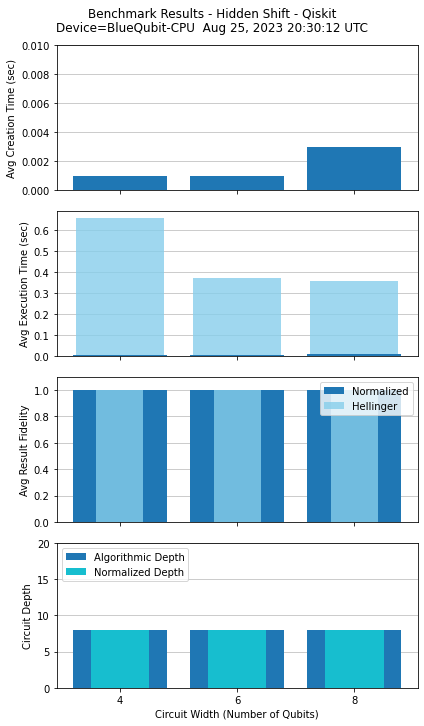

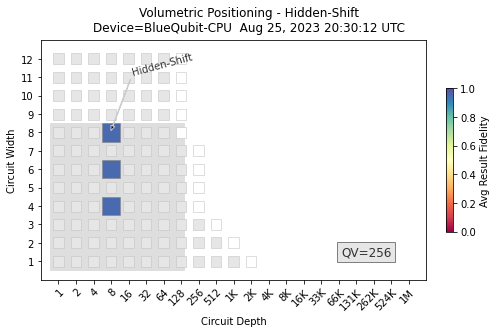

In [6]:
import sys
sys.path.insert(1, "hidden-shift/qiskit")
import hs_benchmark
hs_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Quantum Fourier Transform - Method 1

Quantum Fourier Transform Benchmark Program - Qiskit
... using circuit method 1
... execution starting at Aug 25, 2023 20:28:44 UTC
************
Executing [1] circuits with num_qubits = 4
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: GRWO3RUgVChbgGGk, device: cpu, run status: RUNNING, created on: 2023-08-25 20:28:43 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: GRWO3RUgVChbgGGk, device: cpu, run status: RUNNING, created on: 2023-08-25 20:28:43 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4


... result = Job ID: GRWO3RUgVChbgGGk, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:28:43 UTC, cost: $0.00, run time: 9 ms, queue time: 24 ms, num qubits: 4
  *** executor() time = 0.5936
... number of gates, depth = 29, 22
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 23, 0.48
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 23, 0.48, 12.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.002, 0.594, 0.009 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 6
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: uvKWanlc4NQhjcHY, device: cpu, run status: RUNNING, created on: 2023-08-25 20:28:44 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: uvKWanlc4NQhjcHY, device: cpu, run status: RUNNING, created on: 2023-08-25 20:28:44 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6


... result = Job ID: uvKWanlc4NQhjcHY, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:28:44 UTC, cost: $0.00, run time: 16 ms, queue time: 33 ms, num qubits: 6
  *** executor() time = 0.475
... number of gates, depth = 58, 44
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 45, 0.577
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 45, 0.577, 30.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.004, 0.475, 0.016 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 8
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: knAAYIi0fNIlX9TC, device: cpu, run status: RUNNING, created on: 2023-08-25 20:28:44 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: knAAYIi0fNIlX9TC, device: cpu, run status: RUNNING, created on: 2023-08-25 20:28:44 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8


... result = Job ID: knAAYIi0fNIlX9TC, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:28:44 UTC, cost: $0.00, run time: 25 ms, queue time: 35 ms, num qubits: 8
  *** executor() time = 0.5456
... number of gates, depth = 93, 74
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 75, 0.659
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 75, 0.659, 56.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.005, 0.546, 0.025 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

... execution complete at Aug 25, 2023 20:28:45 UTC in 1.711 secs

Sample Circuit:
      ┌───┐ ░ ┌──────┐ ░  ┌───────┐  ░ ┌──────────┐ ░ ┌─┐         
q0_0: ┤ X ├─░─┤0     ├─░──┤ Rz(π) ├──░─┤0         ├─░─┤M├─────────
      └───┘ ░ │      │ ░ ┌┴───────┴┐ ░ │          │ ░ └╥┘┌─┐      
q0_1: ──────░─┤1     ├─░─┤ Rz(π/2) ├─░─┤1         ├─░──╫─┤M├──────
            ░ │  qft │ ░ ├─────────┤ ░ │  inv_qft │ ░  ║ └╥┘

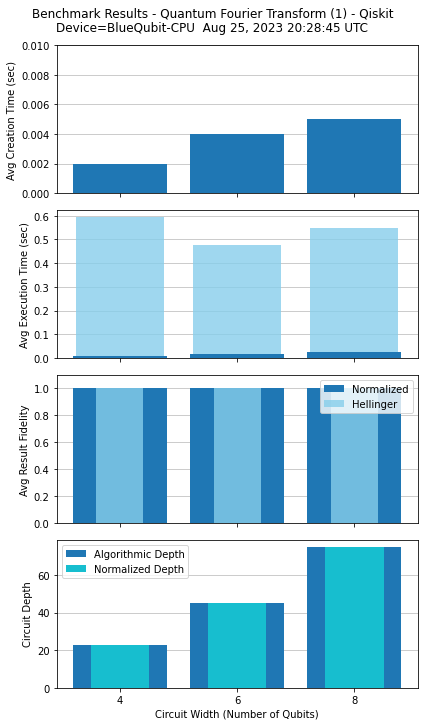

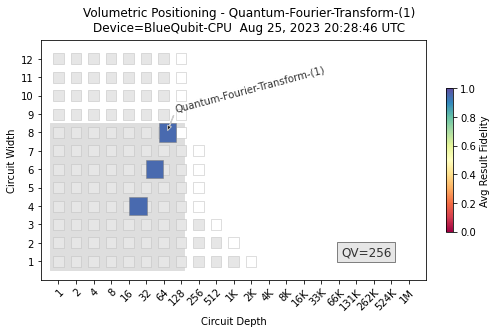

In [3]:
import sys
sys.path.insert(1, "quantum-fourier-transform/qiskit")
import qft_benchmark
qft_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Quantum Fourier Transform - Method 2

Quantum Fourier Transform Benchmark Program - Qiskit
... using circuit method 2
... execution starting at Aug 25, 2023 20:30:29 UTC
************
Executing [1] circuits with num_qubits = 4
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: 4YBC7Jin56ASFTEm, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:28 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: 4YBC7Jin56ASFTEm, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:28 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4


... result = Job ID: 4YBC7Jin56ASFTEm, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:30:28 UTC, cost: $0.00, run time: 5 ms, queue time: 21 ms, num qubits: 4
  *** executor() time = 0.5581
... number of gates, depth = 22, 12
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 13, 0.333
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 13, 0.333, 6.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.002, 0.558, 0.005 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 6
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: z1jyISRBP9xaR2wy, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:29 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: z1jyISRBP9xaR2wy, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:29 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6


... result = Job ID: z1jyISRBP9xaR2wy, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:30:29 UTC, cost: $0.00, run time: 9 ms, queue time: 24 ms, num qubits: 6
  *** executor() time = 0.5033
... number of gates, depth = 39, 23
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 24, 0.455
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 24, 0.455, 15.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.002, 0.503, 0.009 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 8
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: t5Mfc0jO2x9cP0EA, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:29 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: t5Mfc0jO2x9cP0EA, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:29 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8


... result = Job ID: t5Mfc0jO2x9cP0EA, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:30:29 UTC, cost: $0.00, run time: 14 ms, queue time: 38 ms, num qubits: 8
  *** executor() time = 0.4548
... number of gates, depth = 60, 38
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 39, 0.538
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 39, 0.538, 28.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.002, 0.456, 0.014 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

... execution complete at Aug 25, 2023 20:30:31 UTC in 1.534 secs

Sample Circuit:
       ┌───┐ ┌───────┐ ┌──────────┐┌─┐         
q27_0: ┤ H ├─┤ Rz(π) ├─┤0         ├┤M├─────────
       ├───┤┌┴───────┴┐│          │└╥┘┌─┐      
q27_1: ┤ H ├┤ Rz(π/2) ├┤1         ├─╫─┤M├──────
       ├───┤├─────────┤│  inv_qft │ ║ └╥┘┌─┐   
q27_2: ┤ H ├┤ Rz(π/4) ├┤2         ├─╫──╫─┤M├───
       ├───┤├─────────┤│          │ ║  ║

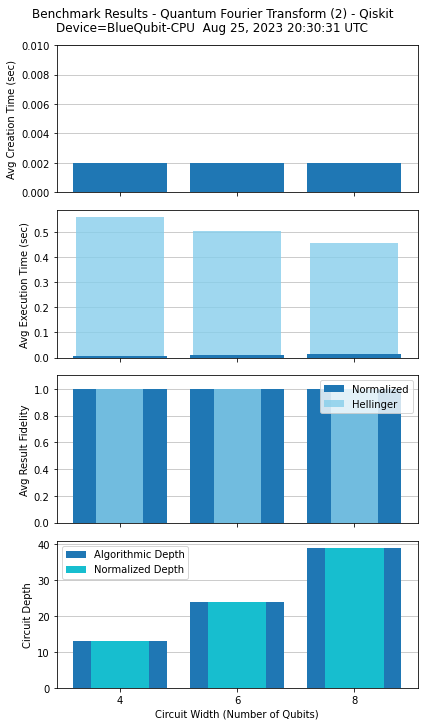

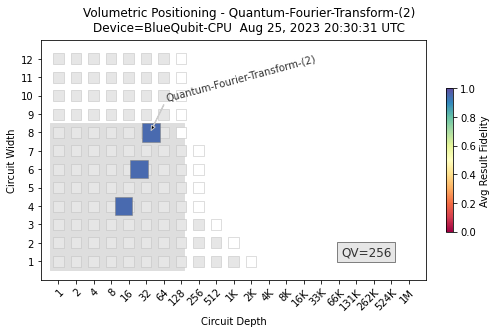

In [7]:
import sys
sys.path.insert(1, "quantum-fourier-transform/qiskit")
import qft_benchmark
qft_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Grover

Grover's Search Benchmark Program - Qiskit
INFO: Grover's Search benchmark is limited to a maximum of 10 qubits.
... execution starting at Aug 11, 2023 22:03:59 UTC
************
Executing [1] circuits with num_qubits = 4
  *** transpile_for_metrics() time = 0.05588
  ... executing circuit on backend=BlueQubit device=gpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: yPikOohwb3fucS1X, device: gpu, run status: RUNNING, created on: 2023-08-11 22:03:59 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: yPikOohwb3fucS1X, device: gpu, run status: RUNNING, created on: 2023-08-11 22:03:59 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 4


... result = Job ID: yPikOohwb3fucS1X, device: gpu, run status: COMPLETED, created on: 2023-08-11 22:03:59 UTC, cost: $0.20, run time: 29 ms, queue time: 25 ms, num qubits: 4
  *** executor() time = 0.5906
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 38, 0.068
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 168, 0.391, 84.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.005, 0.646, 0.029 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.996, 0.995

************
Executing [1] circuits with num_qubits = 6
  *** transpile_for_metrics() time = 0.33907
  ... executing circuit on backend=BlueQubit device=gpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: IpZ6siUi24EehQvW, device: gpu, run status: RUNNING, created on: 2023-08-11 22:04:01 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: IpZ6siUi24EehQvW, device: gpu, run status: RUNNING, created on: 2023-08-11 22:04:01 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 6


... result = Job ID: IpZ6siUi24EehQvW, device: gpu, run status: COMPLETED, created on: 2023-08-11 22:04:01 UTC, cost: $0.20, run time: 614 ms, queue time: 261 ms, num qubits: 6
  *** executor() time = 2.9531
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 62, 0.054
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 1875, 0.472, 1104.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.02, 3.293, 0.614 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 0.995, 0.995

************
Executing [1] circuits with num_qubits = 8
  *** transpile_for_metrics() time = 2.80452
  ... executing circuit on backend=BlueQubit device=gpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: XnQ86pDJY7NpgEG0, device: gpu, run status: RUNNING, created on: 2023-08-11 22:04:16 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: XnQ86pDJY7NpgEG0, device: gpu, run status: RUNNING, created on: 2023-08-11 22:04:16 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 8


... result = Job ID: XnQ86pDJY7NpgEG0, device: gpu, run status: COMPLETED, created on: 2023-08-11 22:04:16 UTC, cost: $0.20, run time: 4675 ms, queue time: 2194 ms, num qubits: 8
  *** executor() time = 18.7273
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 146, 0.039
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 15267, 0.49, 9120.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.031, 21.538, 4.675 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 10
  *** transpile_for_metrics() time = 23.41624
  ... executing circuit on backend=BlueQubit device=gpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: blfzadS5Bfxu5Bst, device: gpu, run status: RUNNING, created on: 2023-08-11 22:06:14 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 10
INFO:bluequbit-python-sdk:Submitted: Job ID: blfzadS5Bfxu5Bst, device: gpu, run status: RUNNING, created on: 2023-08-11 22:06:14 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 10


... result = Job ID: blfzadS5Bfxu5Bst, device: gpu, run status: COMPLETED, created on: 2023-08-11 22:06:14 UTC, cost: $0.20, run time: 38593 ms, queue time: 17959 ms, num qubits: 10
  *** executor() time = 143.7003
************
Average Circuit Algorithmic Depth, ξ (xi) for the 10 qubit group = 302, 0.04
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 10 qubit group = 127803, 0.498, 76600.0
Average Creation, Elapsed, Execution Time for the 10 qubit group = 0.058, 167.163, 38.593 secs
Average Hellinger, Normalized Fidelity for the 10 qubit group = 0.999, 0.999

... execution complete at Aug 11, 2023 22:07:12 UTC in 192.925 secs

Sample Circuit:
        ┌───┐ ░ ┌─────────┐┌───────────┐ ░ ┌─────────┐┌───────────┐ ░ »
q181_0: ┤ H ├─░─┤0        ├┤0          ├─░─┤0        ├┤0          ├─░─»
        ├───┤ ░ │         ││           │ ░ │         ││           │ ░ »
q181_1: ┤ H ├─░─┤1        ├┤1          ├─░─┤1        ├┤1          ├─░─»
        ├───┤ ░ │  oracle ││  diffuser │ ░ │  o

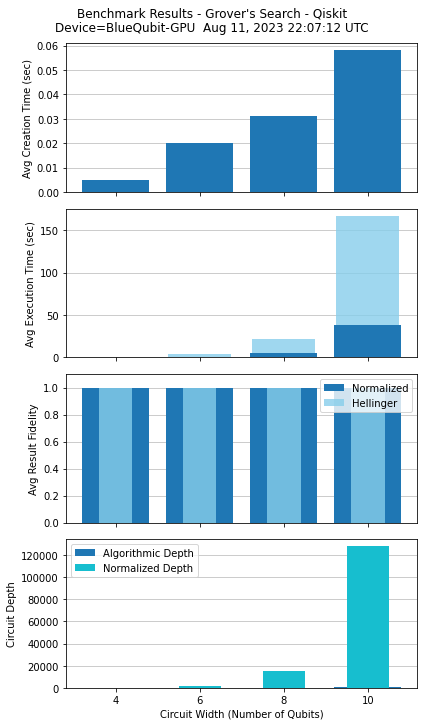

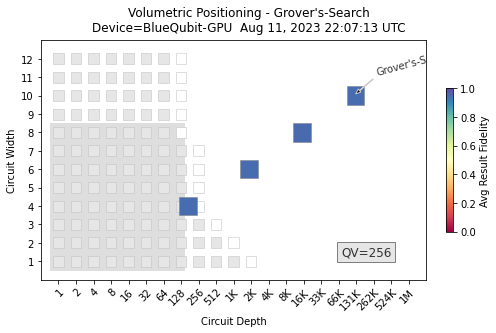

In [11]:
import sys
sys.path.insert(1, "grovers/qiskit")
import grovers_benchmark
grovers_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Phase Estimation

Phase Estimation Benchmark Program - Qiskit
... execution starting at Aug 25, 2023 20:30:58 UTC
************
Executing [1] circuits with num_qubits = 4
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: sdc9wqvQAB2KWRyC, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:57 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: sdc9wqvQAB2KWRyC, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:57 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4


... result = Job ID: sdc9wqvQAB2KWRyC, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:30:57 UTC, cost: $0.00, run time: 8 ms, queue time: 22 ms, num qubits: 4
  *** executor() time = 0.4516
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 27, 0.353
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 27, 0.353, 12.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.006, 0.452, 0.008 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 6
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: nCGoL8UmPCfI90Wy, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:57 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: nCGoL8UmPCfI90Wy, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:57 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6


... result = Job ID: nCGoL8UmPCfI90Wy, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:30:57 UTC, cost: $0.00, run time: 17 ms, queue time: 25 ms, num qubits: 6
  *** executor() time = 0.442
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 58, 0.395
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 58, 0.395, 30.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.006, 0.442, 0.017 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 8
  ... executing circuit on backend=BlueQubit device=cpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: JOmiOagXjd46QC89, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:58 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: JOmiOagXjd46QC89, device: cpu, run status: RUNNING, created on: 2023-08-25 20:30:58 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8


... result = Job ID: JOmiOagXjd46QC89, device: cpu, run status: COMPLETED, created on: 2023-08-25 20:30:58 UTC, cost: $0.00, run time: 29 ms, queue time: 31 ms, num qubits: 8
  *** executor() time = 0.4778
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 101, 0.418
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 101, 0.418, 56.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.008, 0.478, 0.029 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

... execution complete at Aug 25, 2023 20:30:59 UTC in 1.436 secs

Sample Circuit:
       ┌───┐ ░                       ░ ┌──────────┐ ░ ┌─┐      
q33_0: ┤ H ├─░──────────────────■────░─┤0         ├─░─┤M├──────
       ├───┤ ░                  │    ░ │          │ ░ └╥┘┌─┐   
q33_1: ┤ H ├─░───────────■──────┼────░─┤1 inv_qft ├─░──╫─┤M├───
       ├───┤ ░           │      │    ░ │          │ ░  ║ └╥┘┌─┐
q33_2: ┤ H ├─░────■──────┼──────┼────░─┤2 

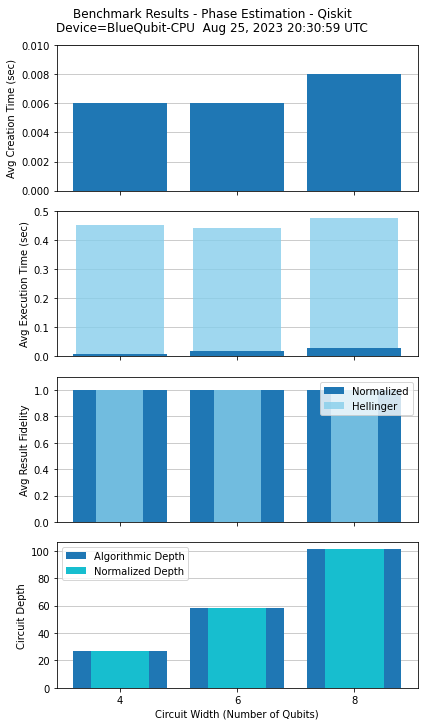

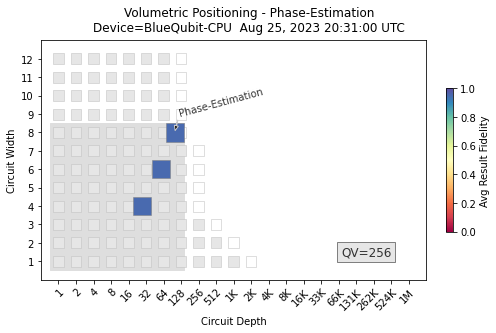

In [8]:
import sys
sys.path.insert(1, "phase-estimation/qiskit")
import pe_benchmark
pe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### HHL Linear Solver

In [12]:
import sys
sys.path.insert(1, "hhl/qiskit")
import hhl_benchmark

hhl_benchmark.verbose=False

hhl_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1, use_best_widths=True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

HHL Benchmark Program - Qiskit
... execution starting at Aug 11, 2023 21:53:56 UTC
************
Executing 1 circuits with 4 qubits, using 1 input qubits and 1 clock qubits
ERROR: Failed to execute circuit 4 1006
... exception = Job anoaIh2jTDEA9J6g finished with status: FAILED_VALIDATION. Mid-circuit measurements are not supported. See https://app.bluequbit.io/docs for more details.
************
Executing 1 circuits with 6 qubits, using 1 input qubits and 3 clock qubits
ERROR: Failed to execute circuit 6 1006
... exception = Job FRbhvFRJQFP0r2XN finished with status: FAILED_VALIDATION. Mid-circuit measurements are not supported. See https://app.bluequbit.io/docs for more details.
... execution complete at Aug 11, 2023 21:53:57 UTC in 1.011 secs

Sample Circuit:
         ┌───┐ ░ ┌───────────┐ ░          ░                           ░        »
  input: ┤ X ├─░─┤0          ├─░──────────░───────────────────────────░────────»
         └───┘ ░ │           │ ░          ░                       

### Amplitude Estimation

Amplitude Estimation Benchmark Program - Qiskit
INFO: Amplitude Estimation benchmark is limited to a maximum of 12 qubits.
... execution starting at Aug 11, 2023 22:07:14 UTC
************
Executing [1] circuits with num_qubits = 4
  *** transpile_for_metrics() time = 0.06283
  ... executing circuit on backend=BlueQubit device=gpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: y7aL4dIOqw72O5RQ, device: gpu, run status: RUNNING, created on: 2023-08-11 22:07:13 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: y7aL4dIOqw72O5RQ, device: gpu, run status: RUNNING, created on: 2023-08-11 22:07:13 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 4


... result = Job ID: y7aL4dIOqw72O5RQ, device: gpu, run status: COMPLETED, created on: 2023-08-11 22:07:13 UTC, cost: $0.20, run time: 51 ms, queue time: 50 ms, num qubits: 4
  *** executor() time = 0.5488
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 208, 0.432
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 175, 0.398, 88.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.015, 0.613, 0.051 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 6
  *** transpile_for_metrics() time = 0.25831
  ... executing circuit on backend=BlueQubit device=gpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: hr99gRuBcM0WXB8F, device: gpu, run status: RUNNING, created on: 2023-08-11 22:07:15 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: hr99gRuBcM0WXB8F, device: gpu, run status: RUNNING, created on: 2023-08-11 22:07:15 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 6


... result = Job ID: hr99gRuBcM0WXB8F, device: gpu, run status: COMPLETED, created on: 2023-08-11 22:07:15 UTC, cost: $0.20, run time: 182 ms, queue time: 136 ms, num qubits: 6
  *** executor() time = 2.4023
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 1017, 0.438
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 836, 0.407, 426.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.032, 2.664, 0.182 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 8
  *** transpile_for_metrics() time = 1.08709
  ... executing circuit on backend=BlueQubit device=gpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: GrqiOZOXFPVD0FnE, device: gpu, run status: RUNNING, created on: 2023-08-11 22:07:22 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: GrqiOZOXFPVD0FnE, device: gpu, run status: RUNNING, created on: 2023-08-11 22:07:22 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 8


... result = Job ID: GrqiOZOXFPVD0FnE, device: gpu, run status: COMPLETED, created on: 2023-08-11 22:07:22 UTC, cost: $0.20, run time: 687 ms, queue time: 454 ms, num qubits: 8
  *** executor() time = 5.2986
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 4214, 0.44
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 3417, 0.409, 1744.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.099, 6.396, 0.687 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 10
  *** transpile_for_metrics() time = 4.27154
  ... executing circuit on backend=BlueQubit device=gpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: uw3W4TkrGHqcq8FT, device: gpu, run status: RUNNING, created on: 2023-08-11 22:07:50 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 10
INFO:bluequbit-python-sdk:Submitted: Job ID: uw3W4TkrGHqcq8FT, device: gpu, run status: RUNNING, created on: 2023-08-11 22:07:50 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 10


... result = Job ID: uw3W4TkrGHqcq8FT, device: gpu, run status: COMPLETED, created on: 2023-08-11 22:07:50 UTC, cost: $0.20, run time: 2746 ms, queue time: 1793 ms, num qubits: 10
  *** executor() time = 23.7046
************
Average Circuit Algorithmic Depth, ξ (xi) for the 10 qubit group = 16927, 0.44
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 10 qubit group = 13642, 0.409, 6958.0
Average Creation, Elapsed, Execution Time for the 10 qubit group = 0.463, 28.02, 2.746 secs
Average Hellinger, Normalized Fidelity for the 10 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 12
  *** transpile_for_metrics() time = 18.78802
  ... executing circuit on backend=BlueQubit device=gpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: fbOmMb2oCNkplkmE, device: gpu, run status: RUNNING, created on: 2023-08-11 22:09:37 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 12
INFO:bluequbit-python-sdk:Submitted: Job ID: fbOmMb2oCNkplkmE, device: gpu, run status: RUNNING, created on: 2023-08-11 22:09:37 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 12


... result = Job ID: fbOmMb2oCNkplkmE, device: gpu, run status: COMPLETED, created on: 2023-08-11 22:09:37 UTC, cost: $0.20, run time: 10839 ms, queue time: 7770 ms, num qubits: 12
  *** executor() time = 87.1342
************
Average Circuit Algorithmic Depth, ξ (xi) for the 12 qubit group = 67668, 0.44
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 12 qubit group = 54407, 0.409, 27732.0
Average Creation, Elapsed, Execution Time for the 12 qubit group = 1.864, 106.122, 10.839 secs
Average Hellinger, Normalized Fidelity for the 12 qubit group = 1.0, 1.0

... execution complete at Aug 11, 2023 22:09:57 UTC in 163.469 secs

Sample Circuit:
        ┌───┐         ┌──────┐┌──────┐ ░ ┌──────────┐ ░ ┌─┐   
q306_0: ┤ H ├─────────┤0     ├┤0     ├─░─┤0         ├─░─┤M├───
        ├───┤ ┌──────┐│      ││      │ ░ │  inv_qft │ ░ └╥┘┌─┐
q306_1: ┤ H ├─┤0     ├┤      ├┤      ├─░─┤1         ├─░──╫─┤M├
        ├───┴┐│      ││  c_Q ││  c_Q │ ░ └──────────┘ ░  ║ └╥┘
q305_0: ┤0   ├┤1 c_Q ├┤1 

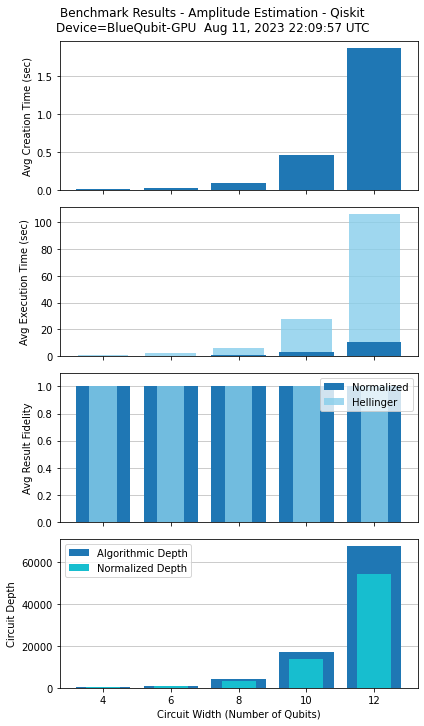

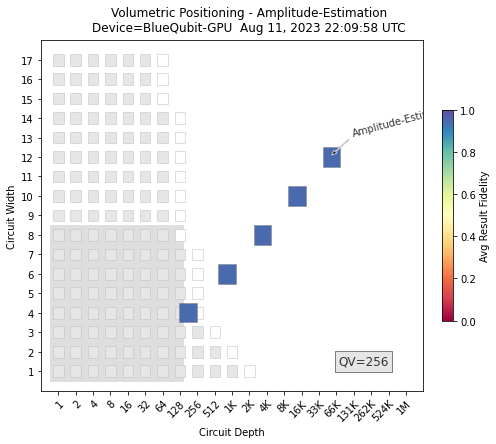

In [12]:
import sys
sys.path.insert(1, "amplitude-estimation/qiskit")
import ae_benchmark
ae_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Monte Carlo

Monte Carlo Sampling Benchmark Program - Qiskit
... using circuit method 2
... execution starting at Aug 11, 2023 21:54:10 UTC
************
Executing [1] circuits with num_qubits = 4


BQ-PYTHON-SDK - INFO - Submitted: Job ID: NAzR9oNPsZwBPh42, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:09 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: NAzR9oNPsZwBPh42, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:09 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 4


************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 202, 0.398
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 208, 0.372, 96.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.018, 0.628, 0.068 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.999, 0.999

************
Executing [1] circuits with num_qubits = 6


BQ-PYTHON-SDK - INFO - Submitted: Job ID: HxyL1TrAZuTS3DG9, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:11 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: HxyL1TrAZuTS3DG9, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:11 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 6


************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 997, 0.402
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 1017, 0.38, 478.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.039, 2.964, 0.29 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 8


BQ-PYTHON-SDK - INFO - Submitted: Job ID: pOulReW4XunfC7YP, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:21 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: pOulReW4XunfC7YP, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:21 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 8


************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 4144, 0.403
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 4214, 0.382, 1984.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.121, 9.319, 1.145 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

... execution complete at Aug 11, 2023 21:54:24 UTC in 14.638 secs

Sample Circuit:
        ┌────┐┌──────┐┌──────┐┌──────┐ ░              ░       
q347_0: ┤0   ├┤1     ├┤1     ├┤1     ├─░──────────────░───────
        │  A ││      ││      ││      │ ░              ░       
q347_1: ┤1   ├┤2     ├┤2 c_Q ├┤2 c_Q ├─░──────────────░───────
        ├───┬┘│  c_Q ││      ││      │ ░ ┌──────────┐ ░ ┌─┐   
q348_0: ┤ H ├─┤      ├┤0     ├┤0     ├─░─┤0         ├─░─┤M├───
        ├───┤ │      │└──────┘└──────┘ ░ │  inv_qft │ ░ └╥┘┌─┐
q348_1: ┤ H ├─┤0     ├─────────────────░─┤1         ├─░──╫─┤M├
        └───┘ └──────┘                 ░ └──────────┘ ░  ║ 

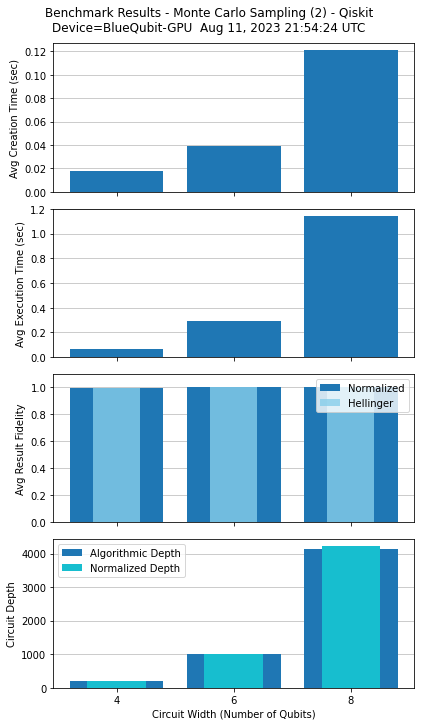

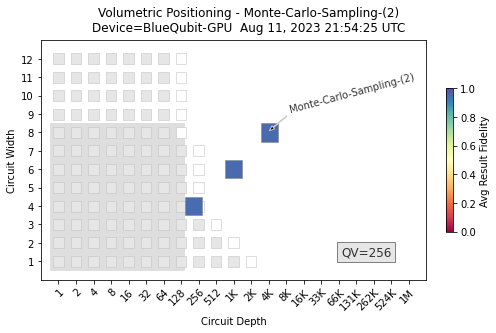

In [14]:
import sys
sys.path.insert(1, "monte-carlo/qiskit")
import mc_benchmark
mc_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Hamiltonian Simulation

Hamiltonian-Simulation Benchmark Program - Qiskit
... execution starting at Aug 11, 2023 21:54:26 UTC
************
Executing [1] circuits with num_qubits = 4


BQ-PYTHON-SDK - INFO - Submitted: Job ID: aWvCyWUPMfgLQN2Y, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:25 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: aWvCyWUPMfgLQN2Y, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:25 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 4


************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 50, 0.276
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 44, 0.293, 27.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.004, 0.505, 0.027 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.998, 0.998

************
Executing [1] circuits with num_qubits = 6


BQ-PYTHON-SDK - INFO - Submitted: Job ID: p4nRyPhyfccxTl1m, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:26 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: p4nRyPhyfccxTl1m, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:26 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 6


************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 50, 0.283
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 44, 0.306, 45.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.02, 0.526, 0.034 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 0.998, 0.998

************
Executing [1] circuits with num_qubits = 8


BQ-PYTHON-SDK - INFO - Submitted: Job ID: xNTmyLPGMGqTGwOY, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:27 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: xNTmyLPGMGqTGwOY, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:27 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 8


************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 50, 0.286
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 44, 0.312, 63.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.017, 0.553, 0.041 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 0.997, 0.997

... execution complete at Aug 11, 2023 21:54:28 UTC in 1.676 secs

Sample Circuit:
        ┌───┐ ░ ┌───────────────┐ ┌──────────────┐ ░ ┌─────────────┐»
q408_0: ┤ X ├─░─┤ Rx(-0.025609) ├─┤ Rz(0.009192) ├─░─┤0            ├»
        └───┘ ░ ├───────────────┤┌┴──────────────┤ ░ │  xxyyzz_opt │»
q408_1: ──────░─┤ Rx(0.0025855) ├┤ Rz(-0.057871) ├─░─┤1            ├»
        ┌───┐ ░ └┬──────────────┤└┬──────────────┤ ░ ├─────────────┤»
q408_2: ┤ X ├─░──┤ Rx(0.035773) ├─┤ Rz(0.051748) ├─░─┤0            ├»
        └───┘ ░  ├──────────────┤ ├──────────────┤ ░ │  xxyyzz_opt │»
q408_3: ──────░──┤ Rx(0.038563) ├─┤ Rz(0.057288) ├─░─┤1            ├»
      

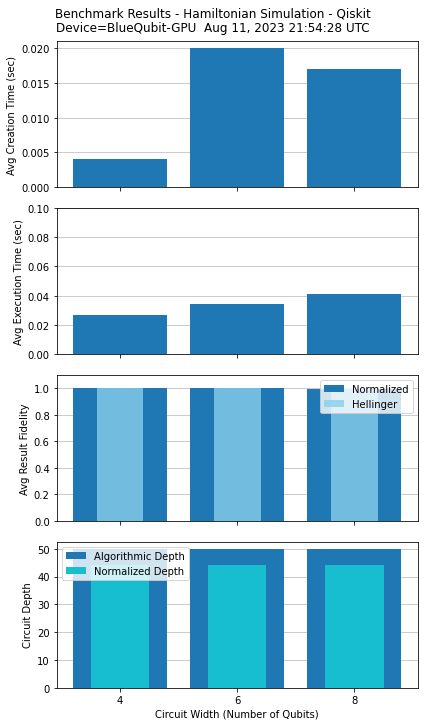

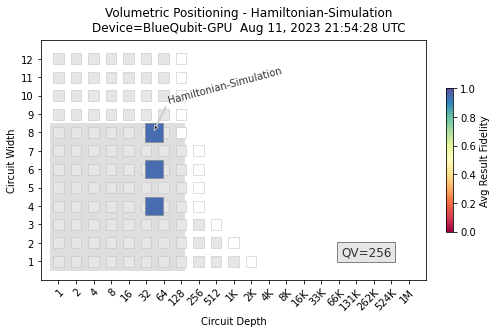

In [15]:
import sys
sys.path.insert(1, "hamiltonian-simulation/qiskit")
import hamiltonian_simulation_benchmark
hamiltonian_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### VQE - Method 1

Variational Quantum Eigensolver Benchmark Program - Qiskit
... using circuit method 1
... execution starting at Aug 11, 2023 21:54:29 UTC
************
Executing [1] circuits with num_qubits = 4


BQ-PYTHON-SDK - INFO - Submitted: Job ID: Nz6hOxNi8wRGND3B, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:29 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: Nz6hOxNi8wRGND3B, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:29 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 4


************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 5, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 76, 0.533, 56.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.004, 0.539, 0.032 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 6


BQ-PYTHON-SDK - INFO - Submitted: Job ID: 8FGn9MKB7KWpyxUE, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:30 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: 8FGn9MKB7KWpyxUE, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:30 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 6


************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 10, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 341, 0.63, 272.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.009, 2.302, 0.098 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 8


BQ-PYTHON-SDK - INFO - Submitted: Job ID: Oj9s6jLiS3vpjrK9, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:34 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: Oj9s6jLiS3vpjrK9, device: gpu, run status: RUNNING, created on: 2023-08-11 21:54:34 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 8


************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 26, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 1543, 0.692, 1280.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.117, 4.055, 0.365 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 0.997, 0.997

... execution complete at Aug 11, 2023 21:54:36 UTC in 7.045 secs

Sample Circuit:
        ┌─────┐┌────────────────────┐┌────────────────────┐»
q462_0: ┤0    ├┤0                   ├┤0                   ├»
        │     ││                    ││                    │»
q462_1: ┤1    ├┤1                   ├┤1                   ├»
        │  Hf ││  Cluster Op (0, 1) ││  Cluster Op (2, 3) │»
q462_2: ┤2    ├┤2                   ├┤2                   ├»
        │     ││                    ││                    │»
q462_3: ┤3    ├┤3                   ├┤3                   ├»
        └─────┘└────────────────────┘└────────────────────┘»
meas: 4/═══════

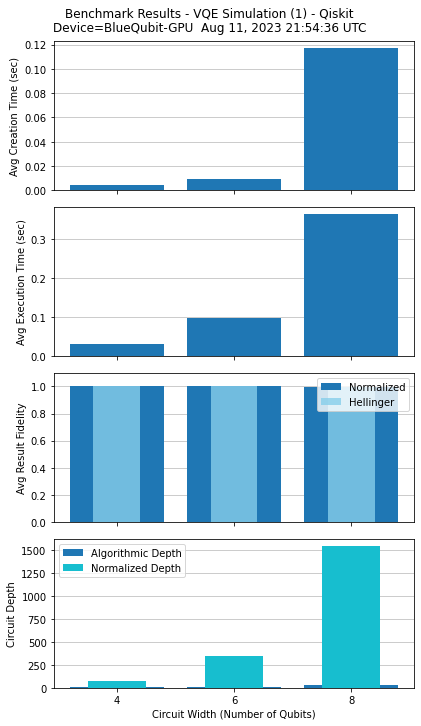

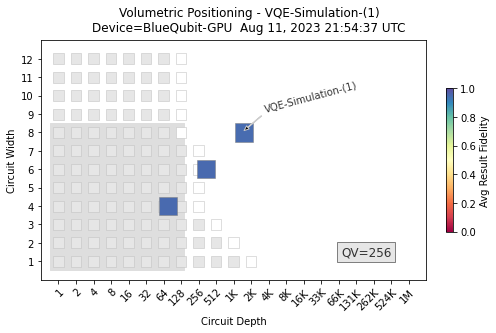

In [16]:
import sys
sys.path.insert(1, "vqe/qiskit")
import vqe_benchmark
vqe_num_shots=4098
vqe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits,
                max_circuits=max_circuits, num_shots=vqe_num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Shor - Method 1

Shor's Order Finding Algorithm Benchmark - Qiskit
... using circuit method 1
... execution starting at Aug 11, 2023 22:09:59 UTC
************
Executing [1] circuits with num_qubits = 10
  *** transpile_for_metrics() time = 0.77091
  ... executing circuit on backend=BlueQubit device=gpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: O3e2XsAyFeN0KSMw, device: gpu, run status: RUNNING, created on: 2023-08-11 22:10:02 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 10
INFO:bluequbit-python-sdk:Submitted: Job ID: O3e2XsAyFeN0KSMw, device: gpu, run status: RUNNING, created on: 2023-08-11 22:10:02 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 10


... result = Job ID: O3e2XsAyFeN0KSMw, device: gpu, run status: COMPLETED, created on: 2023-08-11 22:10:02 UTC, cost: $0.20, run time: 319 ms, queue time: 245 ms, num qubits: 10
  *** executor() time = 3.3695
************
Average Circuit Algorithmic Depth, ξ (xi) for the 10 qubit group = 904, 0.536
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 10 qubit group = 2732, 0.425, 1644.0
Average Creation, Elapsed, Execution Time for the 10 qubit group = 0.313, 4.144, 0.319 secs
Average Hellinger, Normalized Fidelity for the 10 qubit group = 0.999, 0.999

************
Executing [1] circuits with num_qubits = 14
  *** transpile_for_metrics() time = 2.49632
  ... executing circuit on backend=BlueQubit device=gpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: m32Ty2KzjVfc2Hvz, device: gpu, run status: RUNNING, created on: 2023-08-11 22:10:15 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 14
INFO:bluequbit-python-sdk:Submitted: Job ID: m32Ty2KzjVfc2Hvz, device: gpu, run status: RUNNING, created on: 2023-08-11 22:10:15 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 14


... result = Job ID: m32Ty2KzjVfc2Hvz, device: gpu, run status: COMPLETED, created on: 2023-08-11 22:10:15 UTC, cost: $0.20, run time: 948 ms, queue time: 882 ms, num qubits: 14
  *** executor() time = 8.5426
************
Average Circuit Algorithmic Depth, ξ (xi) for the 14 qubit group = 2759, 0.588
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 14 qubit group = 8196, 0.43, 5070.0
Average Creation, Elapsed, Execution Time for the 14 qubit group = 1.007, 11.05, 0.948 secs
Average Hellinger, Normalized Fidelity for the 14 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 18
  *** transpile_for_metrics() time = 6.24844
  ... executing circuit on backend=BlueQubit device=gpu


BQ-PYTHON-SDK - INFO - Submitted: Job ID: otEbkmFCvUTAfQTV, device: gpu, run status: RUNNING, created on: 2023-08-11 22:10:46 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 18
INFO:bluequbit-python-sdk:Submitted: Job ID: otEbkmFCvUTAfQTV, device: gpu, run status: RUNNING, created on: 2023-08-11 22:10:46 UTC, estimated runtime: 100 ms, estimated cost: $0.20, num qubits: 18


... result = Job ID: otEbkmFCvUTAfQTV, device: gpu, run status: COMPLETED, created on: 2023-08-11 22:10:46 UTC, cost: $0.20, run time: 2337 ms, queue time: 2174 ms, num qubits: 18
  *** executor() time = 20.9635
************
Average Circuit Algorithmic Depth, ξ (xi) for the 18 qubit group = 6478, 0.63
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 18 qubit group = 19046, 0.436, 11960.0
Average Creation, Elapsed, Execution Time for the 18 qubit group = 2.113, 27.244, 2.337 secs
Average Hellinger, Normalized Fidelity for the 18 qubit group = 1.0, 1.0

... execution complete at Aug 11, 2023 22:10:52 UTC in 53.328 secs

Sample Circuit:
        ┌───┐ ░                                ┌──────────┐ ░ ┌──────────┐┌─┐»
q386_0: ┤ H ├─░────────────────────────────────┤0         ├─░─┤0         ├┤M├»
        ├───┤ ░                     ┌─────────┐│          │ ░ │          │└╥┘»
q386_1: ┤ H ├─░─────────────────────┤0        ├┤          ├─░─┤1         ├─╫─»
        ├───┤ ░           ┌──

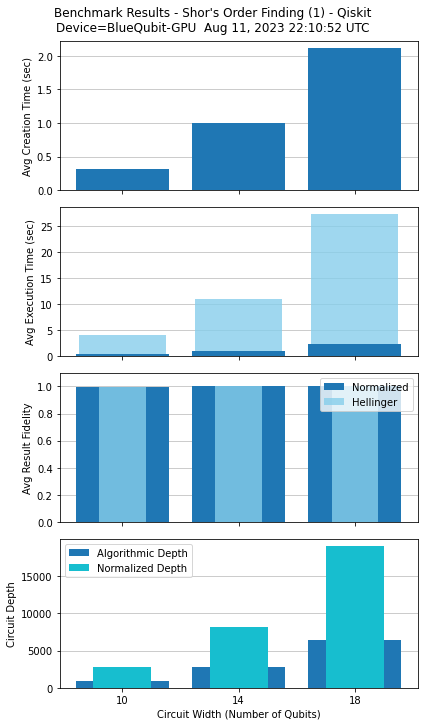

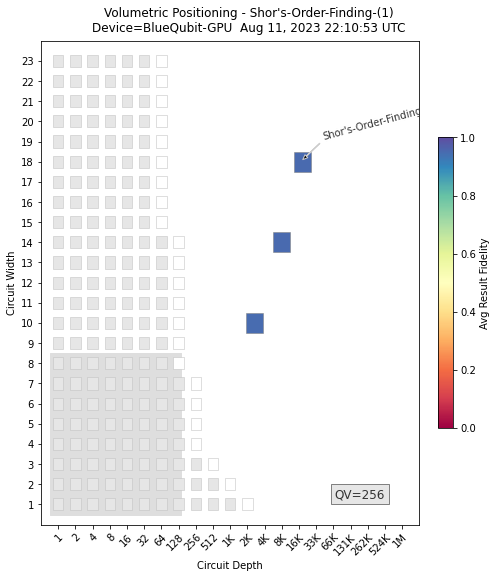

In [13]:
import sys
sys.path.insert(1, "shors/qiskit")
import shors_benchmark
shors_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=1, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Shor - Method 2

In [18]:
import sys
sys.path.insert(1, "shors/qiskit")
import shors_benchmark
shors_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=1, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

Shor's Order Finding Algorithm Benchmark - Qiskit
... using circuit method 2
... execution starting at Aug 11, 2023 21:54:38 UTC
************
Executing [1] circuits with num_qubits = 7
ERROR: Failed to execute circuit 7 (3, 2)
... exception = Job LdMAOccS1qQMnMNB finished with status: FAILED_VALIDATION. Mid-circuit measurements are not supported. See https://app.bluequbit.io/docs for more details.
************
Executing [1] circuits with num_qubits = 9
ERROR: Failed to execute circuit 9 (6, 2)
... exception = Job 3uq2cVuGNBfISXjj finished with status: FAILED_VALIDATION. Mid-circuit measurements are not supported. See https://app.bluequbit.io/docs for more details.
... execution complete at Aug 11, 2023 21:54:52 UTC in 14.586 secs

Sample Circuit:
              ░  ┌───┐ ┌───┐┌──────────┐┌──────┐┌───┐┌─┐┌─┐ ░  ┌───┐ ┌───┐»
  q489: ──────░──┤ X ├─┤ H ├┤0         ├┤ P(0) ├┤ H ├┤M├┤M├─░──┤ X ├─┤ H ├»
        ┌───┐ ░  └─╥─┘ └───┘│          │└──╥───┘└───┘└╥┘└╥┘ ░  └─╥─┘ └───┘»
q490_0: ┤ X ├─░

### Combined Benchmark Results

****** NO RESULTS for HHL ****** 
****** NO RESULTS for Shor's Order Finding (2) ****** 


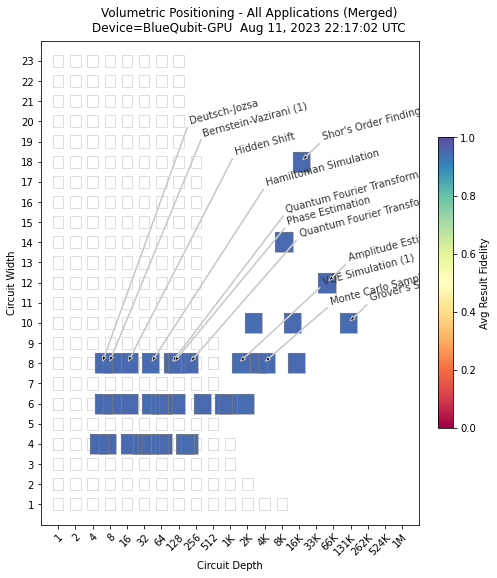

In [14]:
import sys
sys.path.insert(1, "_common")
import metrics

# metrics.depth_base = 2
# metrics.QV = 64
# apps = [ "Hidden Shift", "Grover's Search", "Quantum Fourier Transform (1)", "Hamiltonian Simulation" ]
# backend_id='qasm_simulator'

metrics.QV = 0

metrics.plot_all_app_metrics(backend_id, do_all_plots=False, include_apps=None)